In [9]:
#Kacper Skelnik 291566

import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook 

In [6]:
def warunek_poczatkowy(x:float)->float:
    return np.sin(np.pi*x)

def schemat_eulera(x_step:int, t_steps:int, D:float)->list:
    
    u = np.zeros(x_step)
    d_t = 1/t_steps
    d_x = 1/(x_step*x_step)
    r = d_t/d_x
    
    x_array = np.linspace(0, 1, x_step)
    t_array = np.linspace(0, 1, t_steps)
    
    for i in range(1,x_step-1):
        x = i*np.sqrt(d_x)
        u[i] = warunek_poczatkowy(x)
    
    t_X = []
    for t in range(1,t_steps+1):
        t_X.append(u)
        unew = np.zeros(x_step)
        for i in range(1,x_step-1):
            unew[i] = D*(r*u[i-1] - 2*r*u[i] + r*u[i+1]) + u[i]
        u = unew
    
    return t_X, x_array, t_array

t_X, x, t = schemat_eulera(30,2500,0.1)

X, T = np.meshgrid(x, t)

<IPython.core.display.Javascript object>


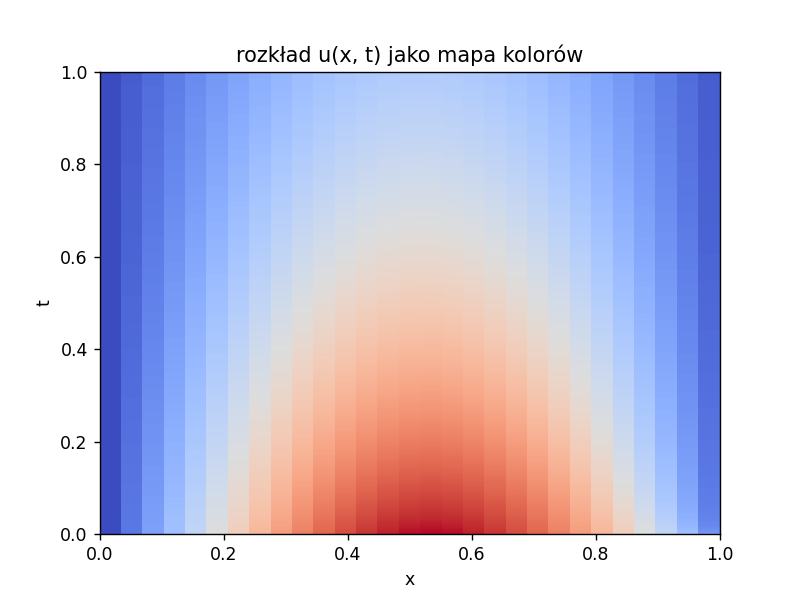

In [7]:
fig = plt.figure()
plt.pcolormesh(X,T,t_X, cmap='coolwarm')
plt.title('rozkład u(x, t) jako mapa kolorów')
plt.xlabel('x')
plt.ylabel('t')

plt.show()

<IPython.core.display.Javascript object>


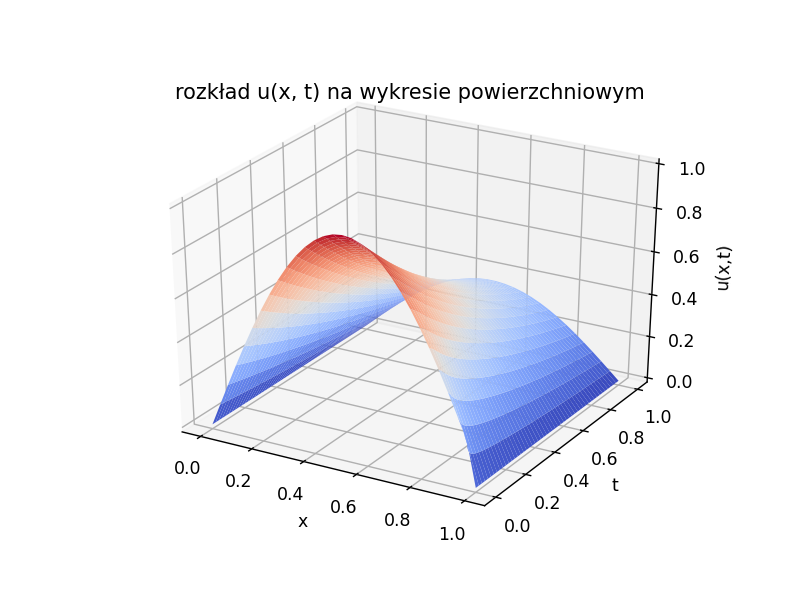

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, np.array(t_X), cmap='coolwarm')
plt.title('rozkład u(x, t) na wykresie powierzchniowym')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')

plt.show()